# Comparison of models for MOST using two different limits for the parameters

## Import components

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(title, fontsize=25)
    sns.despine()

In [3]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel,titleVar = ''):

    f = plt.figure(figsize=(10, 10))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    
    
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 30,
        }
    plt.title(titleVar,fontdict=font)
    plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    
   # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
   # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    

    plt.show()


# Compare Most frame for the fit using gamma ranges [-1,1] and [0,1]
--------------------------------------------------------------------


# Load parameters for both conditions

In [4]:
# Load params from DISLIKE  model (using inverted input [3-value])
Dislike_sufix = '_More_NoBin_excludedTrial_Gamma_01_NUTS_32'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_PF2019_full_individual'+Dislike_sufix+'.npy'))   

# Load params from LIKE  model
Like_sufix = '_More_NoBin_excludedTrial_Gamma-11_NUTS_32'
glam_full_like_estimates = np.load(str('results/estimates/glam_PF2019_full_individual'+Like_sufix+'.npy'))   

In [5]:
params_part_like = pd.DataFrame(glam_full_like_estimates.item(0))
params_part_dislike = pd.DataFrame(glam_full_dislike_estimates.item(0))


for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

In [6]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000041,0.80,198.29,0.009338,1.80,0.0
1,1.0,0.05,0.000012,0.88,367.84,0.004970,0.29,0.0
2,1.0,0.05,0.000030,0.45,210.70,0.007683,0.13,0.0
3,1.0,0.05,0.000024,0.94,370.45,0.009844,0.26,0.0
4,1.0,0.05,0.000034,0.76,156.19,0.005216,0.12,0.0
5,1.0,0.05,0.000046,0.69,119.54,0.007503,0.09,0.0
6,1.0,0.05,0.000025,0.87,419.20,0.010721,0.14,0.0
7,1.0,0.05,0.000044,-0.95,166.28,0.007235,0.30,0.0
8,1.0,0.05,0.000095,0.99,78.09,0.006916,0.02,0.0
9,1.0,0.05,0.000042,-0.25,161.82,0.008795,0.27,0.0


## participants that should be removed if we follow the removal product of inestabilities in the simulation. For purposes of the comparison of the parameter for range [0,1]. I'm not removing them.

In [7]:
[1,13,16,20,31]

[1, 13, 16, 20, 31]

## Parameters Like

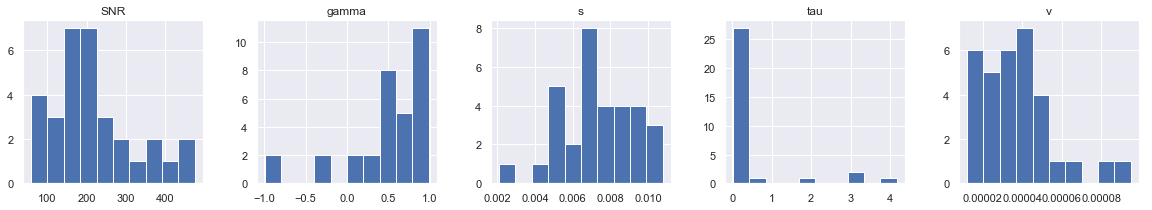

In [8]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

## Parameters Dislike

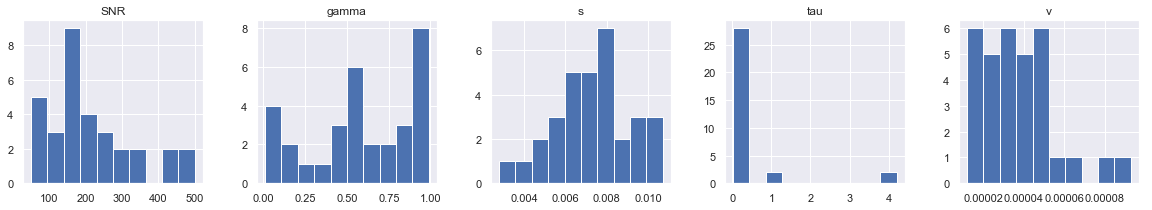

In [9]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

In [10]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [11]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [12]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  3.3384374999999977 ; p-value =0.7834062541337938
Gamma: [Like - Dislike] =  -0.08281250000000018 ; p-value =0.0661500882815104
Tau: [Like - Dislike] =  0.08156249999999993 ; p-value =0.685036890252396
V: [Like - Dislike] =  -6.25000000000083e-08 ; p-value =0.7512205376877169
S: [Like - Dislike] =  6.293750000000136e-05 ; p-value =0.5570850112331179


MeanL = 0.51; MeanD = 0.6; [Like - Dislike] =  -0.08; t =  -1.9 ; p-value =0.07
MeanL = 0.53; MeanD = 0.44; [Like - Dislike] =  0.08; t =  0.41 ; p-value =0.69
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  -0.0; t =  -0.32 ; p-value =0.75
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  0.0; t =  0.59 ; p-value =0.56


(0.004, 0.012)

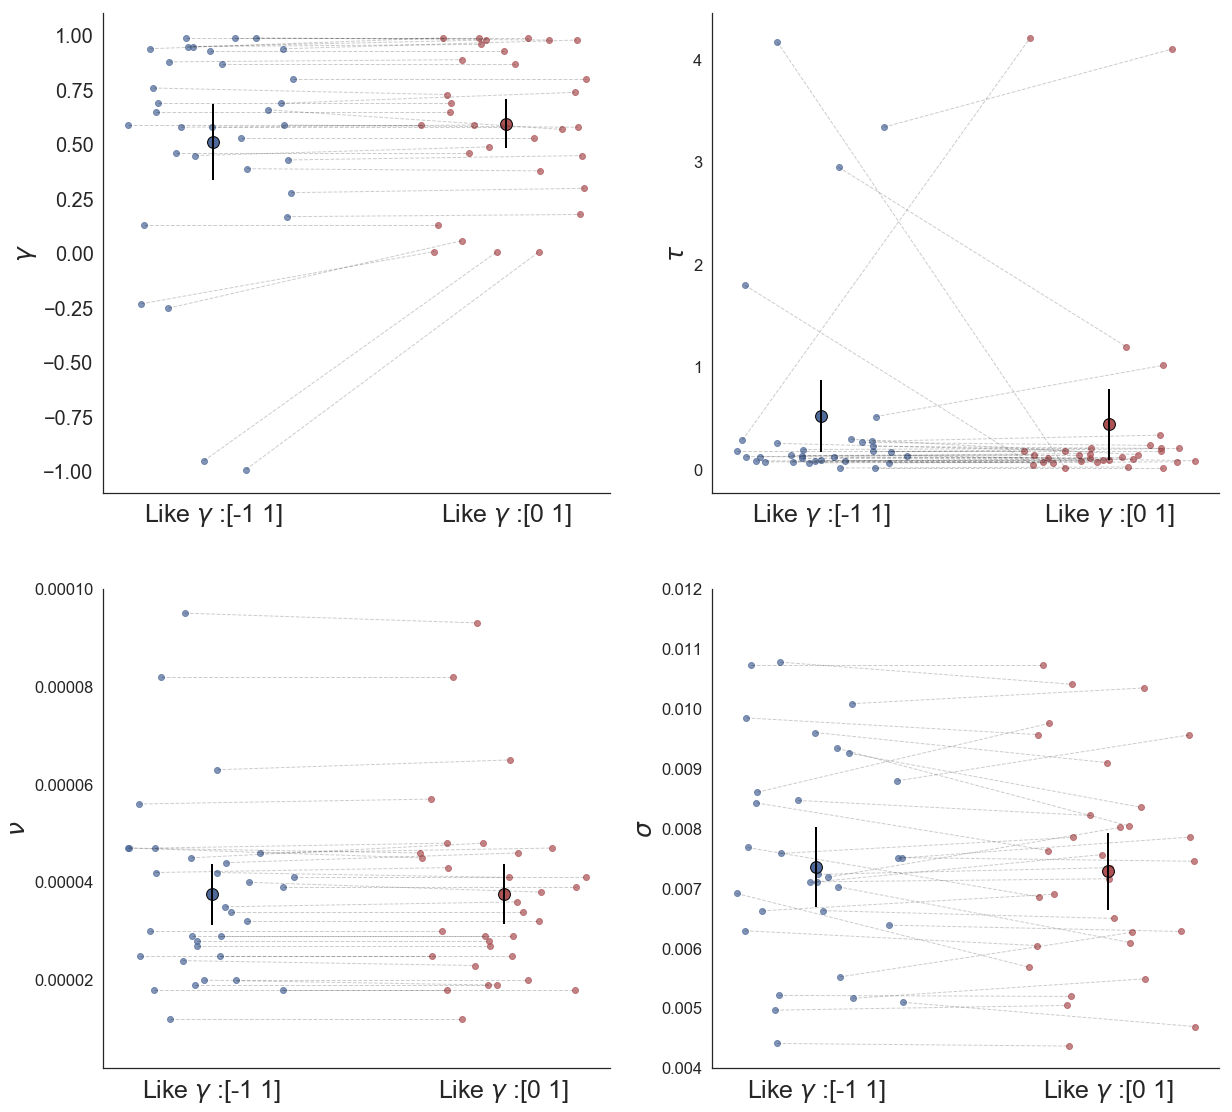

In [13]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = '$\gamma$')
plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = r'$\tau$')
plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = '$\sigma$')
plt.ylim(0.004,0.012 )

Pearson's r = 0.917 p =  0.0


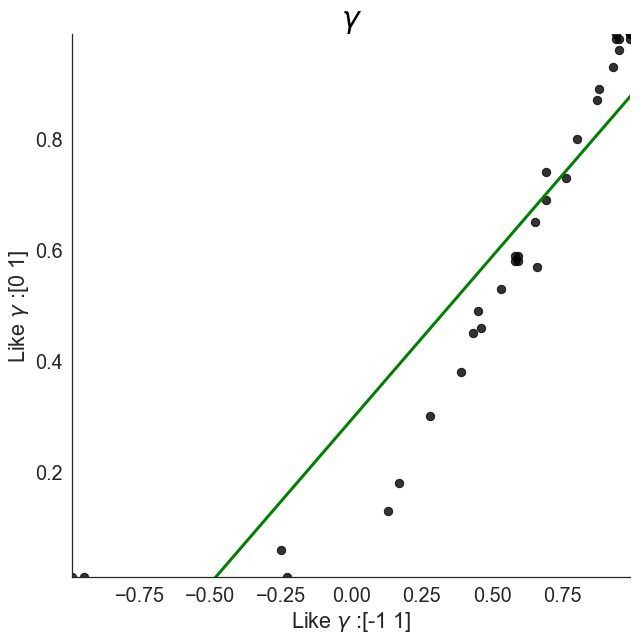

In [14]:
LD_Gamma =  pd.DataFrame()
LD_Gamma['Dislike'] =  params_part_dislike.gamma
LD_Gamma['Like'] =   params_part_like.gamma
correl_plot(LD_Gamma,'Like', 'Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]', r'$\gamma$')



Pearson's r = 0.385 p =  0.029


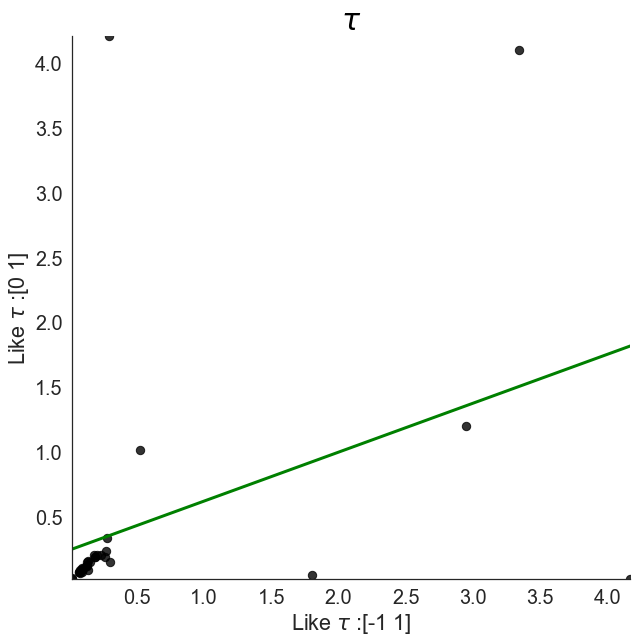

In [15]:
LD_Tau =  pd.DataFrame()
LD_Tau['Dislike'] =  params_part_dislike.tau
LD_Tau['Like'] =  params_part_like.tau
correl_plot(LD_Tau,'Like', 'Like '+ r'$\tau$' + ' :[-1 1]','Dislike','Like '+ r'$\tau$'+' :[0 1]', r'$\tau$')

Pearson's r = 0.952 p =  0.0


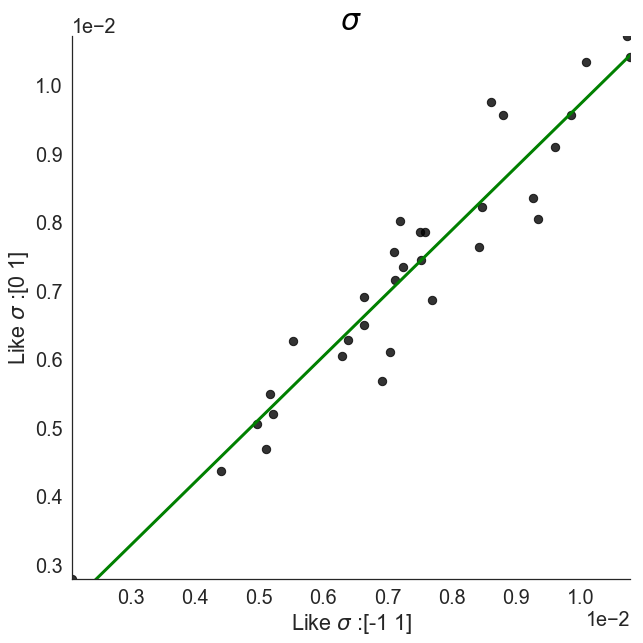

In [16]:
LD_S =  pd.DataFrame()
LD_S['Dislike'] =  params_part_dislike.s
LD_S['Like'] =  params_part_like.s
correl_plot(LD_S,'Like', 'Like '+ r'$\sigma$' + ' :[-1 1]','Dislike','Like '+ r'$\sigma$'+' :[0 1]', r'$\sigma$')

Pearson's r = 0.998 p =  0.0


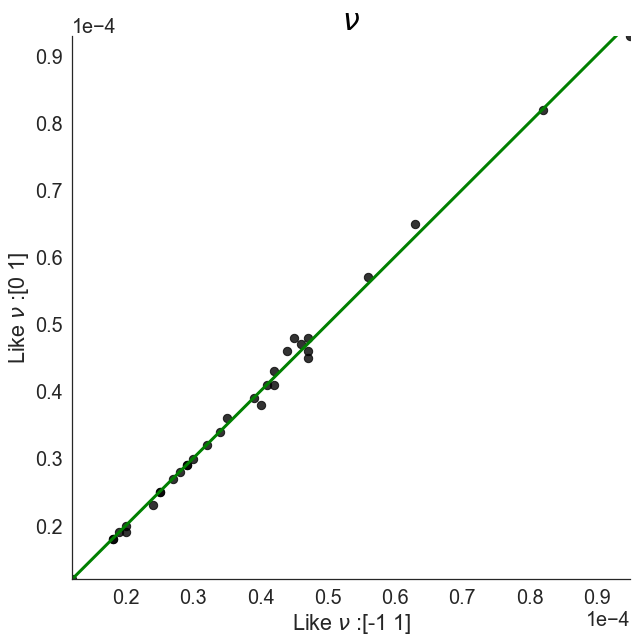

In [17]:
LD_V =  pd.DataFrame()
LD_V['Dislike'] =  params_part_dislike.v
LD_V['Like'] =  params_part_like.v
correl_plot(LD_V,'Like','Like '+ r'$\nu$' + ' :[-1 1]','Dislike','Like '+ r'$\nu$'+' :[0 1]',r'$\nu$')

In [18]:
params_like_01 = params_part_dislike

# Compare Dislike frame for the fit using gamma ranges [-1,1] and [0,1]
--------------------------------------------------------

# Load parameters for both conditions

In [19]:

Dislike_sufix = '_Less_Inv_NoBin_excludedTrial_Gamma_01_NUTS_32'
Like_sufix = '_Less_Inv_NoBin_excludedTrial_Gamma-11_NUTS_32'

glam_full_dislike_estimates = np.load(str('results/estimates/glam_PF2019_full_individual'+Dislike_sufix+'.npy'))   
glam_full_like_estimates = np.load(str('results/estimates/glam_PF2019_full_individual'+Like_sufix+'.npy'))   

In [20]:
len(glam_full_dislike_estimates)

32

In [21]:
params_part_like = pd.DataFrame(glam_full_like_estimates.item(0))
params_part_dislike = pd.DataFrame(glam_full_dislike_estimates.item(0))


for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

In [22]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000050,0.71,216.76,0.008308,0.07,0.0
1,1.0,0.05,0.000014,0.50,430.13,0.005996,0.15,0.0
2,1.0,0.05,0.000034,0.10,179.16,0.006028,0.08,0.0
3,1.0,0.05,0.000021,0.55,485.93,0.009992,0.12,0.0
4,1.0,0.05,0.000031,0.11,190.33,0.005490,0.06,0.0
5,1.0,0.05,0.000052,-0.52,168.21,0.007056,0.08,0.0
6,1.0,0.05,0.000029,0.20,242.06,0.007130,0.11,0.0
7,1.0,0.05,0.000052,-0.39,107.23,0.006266,0.07,0.0
8,1.0,0.05,0.000106,0.79,49.08,0.005228,0.02,0.0
9,1.0,0.05,0.000054,0.31,115.47,0.007127,0.13,0.0


In [23]:
params_part_like = pd.DataFrame(glam_full_like_estimates.item(0))
params_part_dislike = pd.DataFrame(glam_full_dislike_estimates.item(0))


for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

## Parameters Like

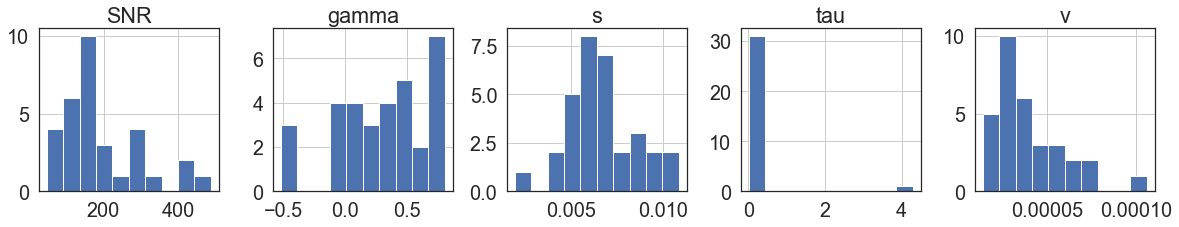

In [24]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

## Parameters Dislike

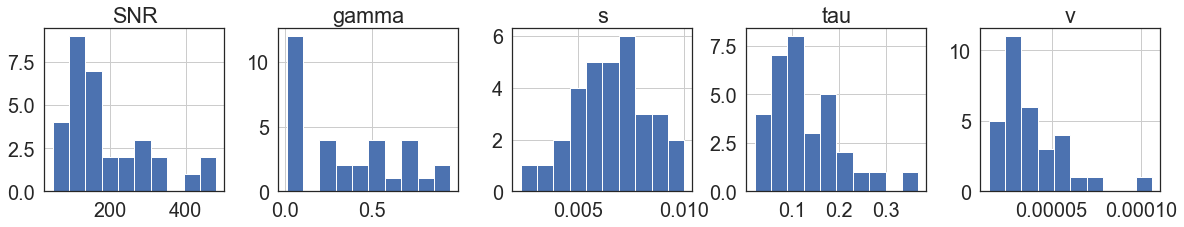

In [25]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

In [26]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [27]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [28]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )
print ("V: Like : " + str(mean(params_part_like.v)) + " ; Dislike =" + str(mean(params_part_dislike.v)) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  3.795937500000065 ; p-value =0.5600782593071754
Gamma: [Like - Dislike] =  -0.055625000000000036 ; p-value =0.05371234694618243
Tau: [Like - Dislike] =  0.12531250000000005 ; p-value =0.3577384007941711
V: [Like - Dislike] =  2.499999999999993e-07 ; p-value =0.2545206910984541
V: Like : 3.925e-05 ; Dislike =3.9e-05
S: [Like - Dislike] =  7.356249999999984e-05 ; p-value =0.5269019142604034


In [29]:
def add_star(list1,list2):
    x1, x2 = 1, 2   
    y_max = max([list1.max(),list2.max()])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


MeanL = 0.29; MeanD = 0.35; [Like - Dislike] =  -0.06; t =  -2.01 ; p-value =0.05
MeanL = 0.25; MeanD = 0.13; [Like - Dislike] =  0.13; t =  0.93 ; p-value =0.36
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  0.0; t =  1.16 ; p-value =0.25
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  0.0; t =  0.64 ; p-value =0.53


(0.004, 0.012)

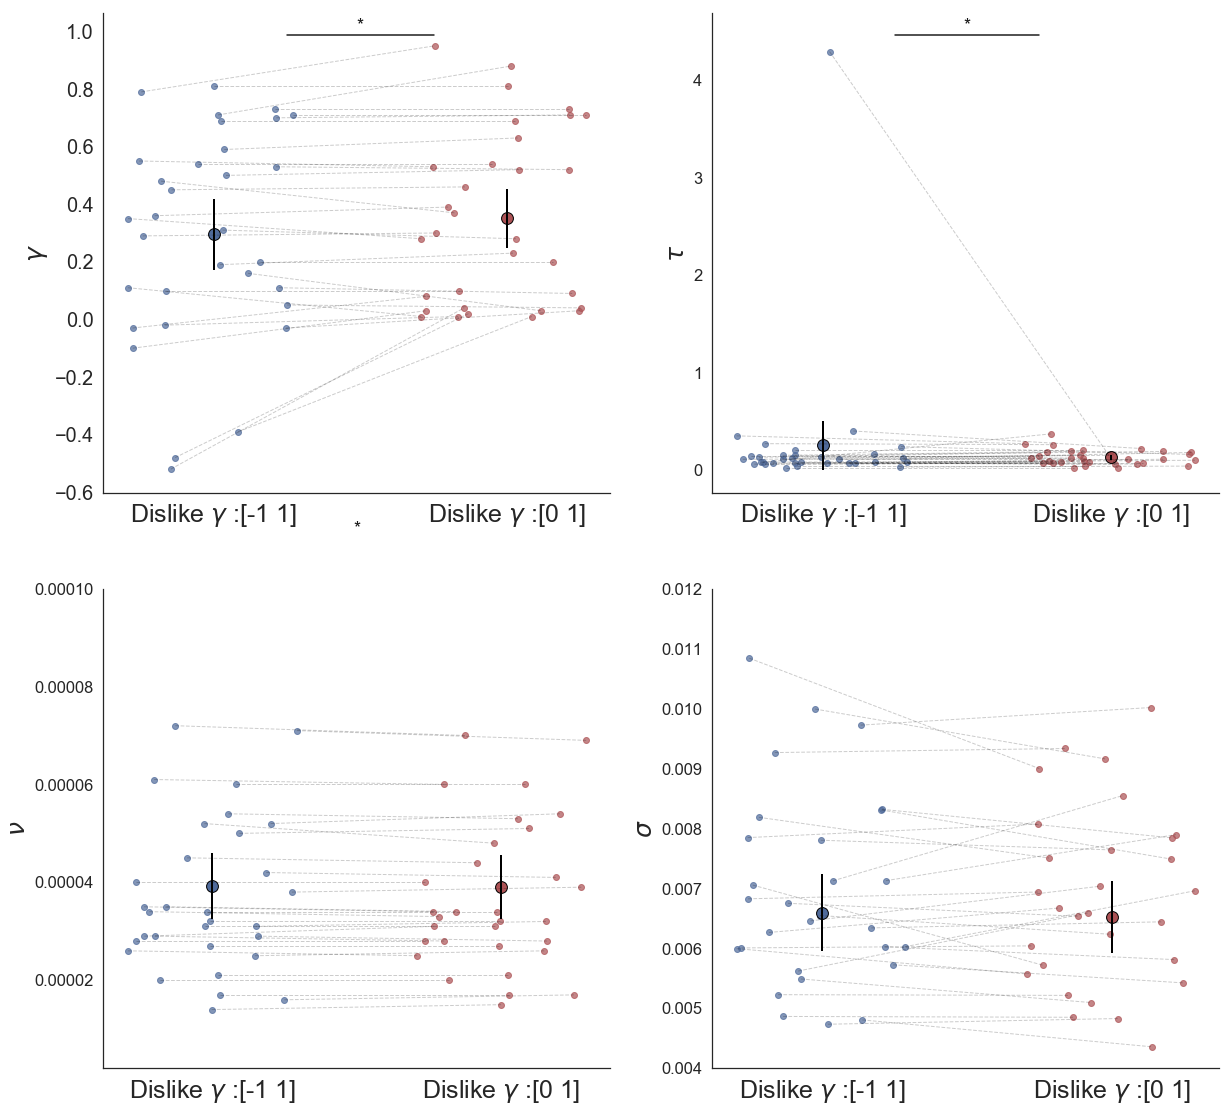

In [30]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]',  'Dislike '+ r'$\gamma$' + ' :[0 1]',title = '$\gamma$')
add_star(params_part_like.gamma,params_part_dislike.gamma)

plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]', 'Dislike '+ r'$\gamma$' + ' :[0 1]',title = r'$\tau$')
add_star(params_part_like.tau,params_part_dislike.tau)

plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]', 'Dislike '+ r'$\gamma$' + ' :[0 1]',title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
add_star(params_part_like.v,params_part_dislike.v)

plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]',  'Dislike '+ r'$\gamma$' + ' :[0 1]',title = '$\sigma$')
plt.ylim(0.004,0.012 )

Pearson's r = 0.907 p =  0.0


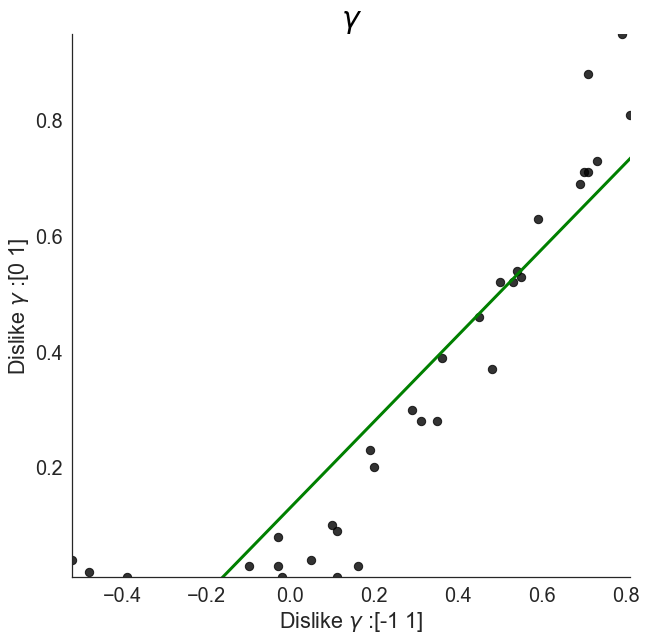

In [31]:
LD_Gamma =  pd.DataFrame()
LD_Gamma['Dislike'] =  params_part_dislike.gamma
LD_Gamma['Like'] =  params_part_like.gamma
correl_plot(LD_Gamma,'Like', 'Dislike '+ r'$\gamma$' + ' :[-1 1]','Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\gamma$')

Pearson's r = -0.176 p =  0.336


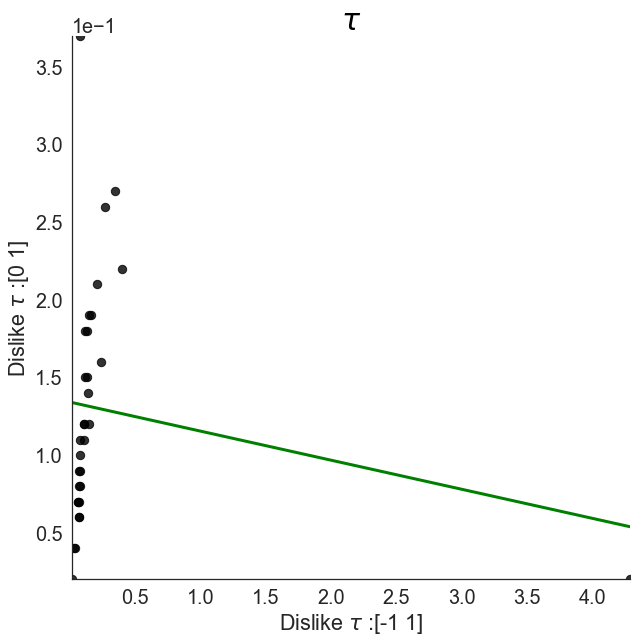

In [32]:
LD_Tau =  pd.DataFrame()
LD_Tau['Dislike'] =  params_part_dislike.tau
LD_Tau['Like'] =  params_part_like.tau
correl_plot(LD_Tau,'Like','Dislike '+ r'$\tau$' + ' :[-1 1]','Dislike','Dislike '+ r'$\tau$' + ' :[0 1]',r'$\tau$')

Pearson's r = 0.939 p =  0.0


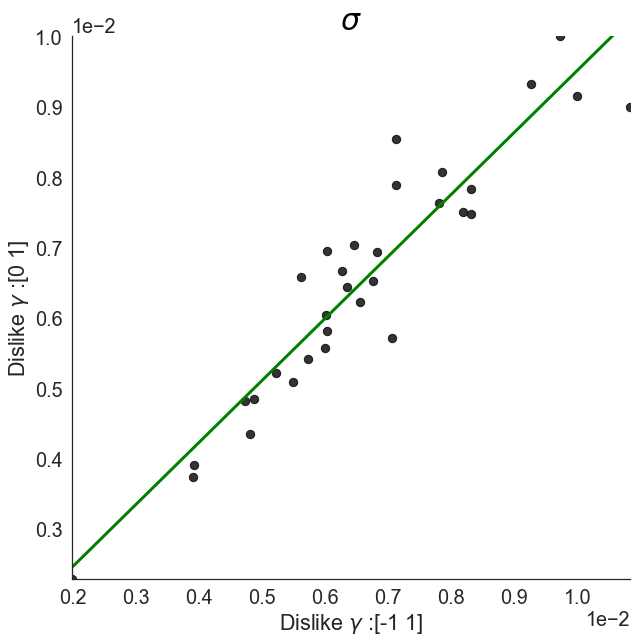

In [33]:
LD_S =  pd.DataFrame()
LD_S['Dislike'] =  params_part_dislike.s
LD_S['Like'] =  params_part_like.s
correl_plot(LD_S,'Like', 'Dislike '+ r'$\gamma$' + ' :[-1 1]','Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\sigma$')

Pearson's r = 0.998 p =  0.0


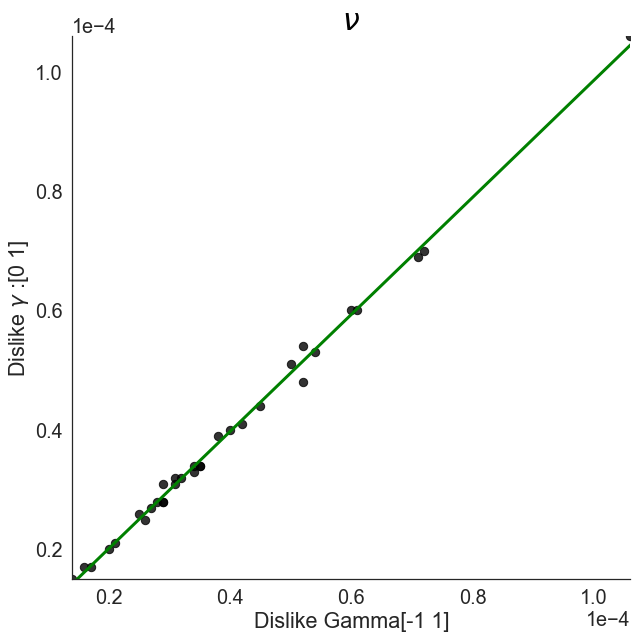

In [34]:
LD_V =  pd.DataFrame()
LD_V['Dislike'] =  params_part_dislike.v
LD_V['Like'] =  params_part_like.v
correl_plot(LD_V,'Like', "Dislike Gamma[-1 1]",'Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\nu$')

In [35]:
params_dislike_01 = params_part_dislike

## Violin plot for the comparison of the parameters

In [36]:
# Add asterisk
def add_star1(data1, data2,p):
    if p<0.05:
        if p < 0.001:
            star_num = '***' #3
        elif p< 0.01:
            star_num = '**' #2
        elif p< 0.05:
            star_num = '*' #1
        else:
            star_num = 0
        
        x1, x2 = 1, 2   
        y_max = max([np.max(data1), np.max(data2)])
        y, h, col = y_max + y_max/50, y_max/50, 'k'
        plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_num, ha='center', va='bottom', color=col, fontsize = 30)

In [37]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
  #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [38]:
params_part_like = params_like_01
params_part_dislike = params_dislike_01

## We used repeated measures t-test to look for differences between both conditions.

In [39]:
mean1 = mean(params_part_like.SNR) 
mean2= mean(params_part_dislike.SNR)
diff = mean1 - mean2
[s, p_SNR] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: Like:"+str(mean1)+" ; Dislike : " + str(mean2)+ "; ∆ =  " + str(diff) + " ; t =" + str(s) + " ; p =" + str(p_SNR) )

mean1 = mean(params_part_like.gamma) 
mean2= mean(params_part_dislike.gamma)
diff = mean1 - mean2
[s, p_gamma] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: Like:"+str(mean1)+" ; Dislike : " + str(mean2)+ "; ∆ =  " + str(diff) +  " ; t =" + str(s) + " ; p =" + str(p_gamma) )


mean1 = mean(params_part_like.tau) 
mean2= mean(params_part_dislike.tau)
diff = mean1 - mean2
[s, p_tau] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: Like:"+str(mean1)+" ; Dislike : " + str(mean2)+ "; ∆ =  " + str(diff) + " ; t =" + str(s) +  " ; p =" + str(p_tau) )

mean1 = mean(params_part_like.v) 
mean2= mean(params_part_dislike.v)
diff = mean1 - mean2
[s, p_v] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: Like:"+str(mean1)+" ; Dislike : " + str(mean2)+ "; ∆ =  " + str(diff) + " ; t =" + str(s) +  " ; p =" + str(p_v) )

mean1 = mean(params_part_like.s) 
mean2= mean(params_part_dislike.s)
diff = mean1 - mean2
[s, p_s] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: Like:"+str(mean1)+" ; Dislike : " + str(mean2)+ "; ∆ =  " + str(diff) + " ; t =" + str(s) +  " ; p =" + str(p_s) )

SNR: Like:214.2225 ; Dislike : 190.57843749999998; ∆ =  23.644062500000018 ; t =1.5489110083887143 ; p =0.13155290195821434
Gamma: Like:0.5965625000000001 ; Dislike : 0.350625; ∆ =  0.2459375000000001 ; t =4.220439518725455 ; p =0.00019724443284104215
Tau: Like:0.44406249999999997 ; Dislike : 0.12937500000000002; ∆ =  0.31468749999999995 ; t =1.7670510178080483 ; p =0.08706457535861861
V: Like:3.759375000000001e-05 ; Dislike : 3.9e-05; ∆ =  -1.4062499999999901e-06 ; t =-0.9041452376552671 ; p =0.37289142186555246
S: Like:0.007286843749999999 ; Dislike : 0.0065249687499999995; ∆ =  0.0007618749999999995 ; t =3.5324393497284436 ; p =0.0013135388429121688


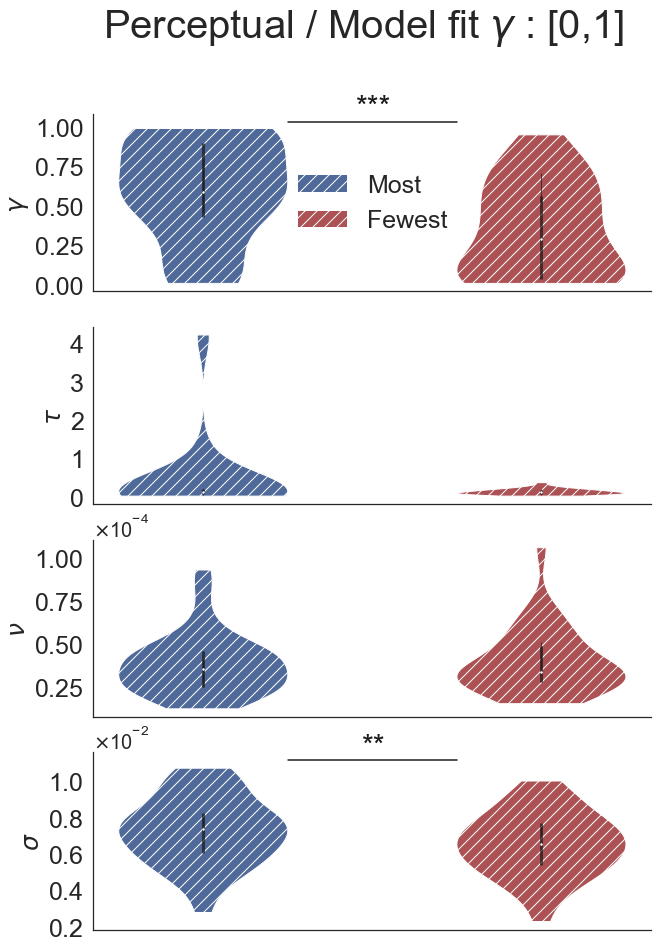

In [40]:
ysize = 25
ticksize = 25
nticks = 5

f= plt.figure(figsize=(10,15))
sns.set(style='white', font_scale=1.8)

colr_dict = { 0:'#4F6A9A', 1:'#AC5255' }

ax = plt.subplot(411)

## ** Since SNR is a function of gamma we plot gamma as the free parameter 

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma.values,
            params_part_dislike.gamma.values]
add_violin(all_arr1)

add_star1(all_arr1[0], all_arr1[1],p_gamma)
#plt.xticks([1 ,2], ['Most', 'Few'])
plt.ylabel(r'$\gamma$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))


# PLot legend
patch1 = mpatches.Patch(facecolor=colr_dict[0],hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor=colr_dict[1],hatch=r'//', label='Fewest')

leg = plt.legend(handles=[patch1,patch2],fontsize=25,loc = "center")
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)


# FOR tau
ax = plt.subplot(412)
all_arr1 = [params_part_like.tau.values,
            params_part_dislike.tau.values]

add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1],p_tau)
plt.ylabel(r'$\tau$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))



# FOR v
ax = plt.subplot(413)
all_arr1 = [params_part_like.v.values,
            params_part_dislike.v.values]
add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1],p_v)
plt.ylabel(r'$\nu$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# FOR s
ax = plt.subplot(414)
all_arr1 = [params_part_like.s.values,
            params_part_dislike.s.values]
add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1],p_s)
plt.ylabel(r'$\sigma$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

plt.suptitle('Perceptual / Model fit ' + r'$\gamma$'+ ' : [0,1]', size = 40)


sns.despine()

## **Except for Gamma the other parameters matain their order across participants**